#  Background and Context

    You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base. A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.
    
    However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
    
    However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient. You as a Data Scientist at "Visit with us" travel company have to analyze the customer's data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Objective

    To predict which customer is more likely to purchase the newly introduced travel package.

# Data Dictionary

    CustomerID: Unique customer ID
    ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    Age: Age of customer
    TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
    Occupation: Occupation of customer
    Gender: Gender of customer
    NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    PreferredPropertyStar: Preferred hotel property rating by customer
    MaritalStatus: Marital status of customer
    NumberOfTrips: Average number of trips in a year by customer
    Passport: The customer has a passport or not (0: No, 1: Yes)
    OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    Designation: Designation of the customer in the current organization
    MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

    PitchSatisfactionScore: Sales pitch satisfaction score
    ProductPitched: Product pitched by the salesperson
    NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
    DurationOfPitch: Duration of the pitch by a salesperson to the customer

## I'll using various method and code snippet used in case study and video lectures for this project work

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
# adds a nice background to the graphs
sns.set(color_codes=True) 
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
sns.set_palette("pastel") # Set the palette to the "pastel"

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

### Read the Dataset

In [2]:
excel = pd.ExcelFile("Tourism.xlsx")
excel.sheet_names

['Data Dict', 'Tourism']

In [3]:
# Parsing only the Tourism tab of excel sheet for data
df = excel.parse("Tourism")

In [4]:
# copying data to another varaible to avoid any changes to original data
tourism = df.copy()

### View the first and last 5 rows of the dataset.

In [5]:
tourism.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00,Self Enquiry,3,6.00,Salaried,Female,3,3.00,Deluxe,3.00,Single,1.00,1,2,1,0.00,Manager,20993.00
1,200001,0,49.00,Company Invited,1,14.00,Salaried,Male,3,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,2.00,Manager,20130.00
2,200002,1,37.00,Self Enquiry,1,8.00,Free Lancer,Male,3,4.00,Basic,3.00,Single,7.00,1,3,0,0.00,Executive,17090.00
3,200003,0,33.00,Company Invited,1,9.00,Salaried,Female,2,3.00,Basic,3.00,Divorced,2.00,1,5,1,1.00,Executive,17909.00
4,200004,0,nan,Self Enquiry,1,8.00,Small Business,Male,2,3.00,Basic,4.00,Divorced,1.00,0,5,1,0.00,Executive,18468.00


In [6]:
tourism.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.00,Self Enquiry,3,9.00,Small Business,Male,3,5.00,Deluxe,4.00,Unmarried,2.00,1,1,1,1.00,Manager,26576.00
4884,204884,1,28.00,Company Invited,1,31.00,Salaried,Male,4,5.00,Basic,3.00,Single,3.00,1,3,1,2.00,Executive,21212.00
4885,204885,1,52.00,Self Enquiry,3,17.00,Salaried,Female,4,4.00,Standard,4.00,Married,7.00,0,1,1,3.00,Senior Manager,31820.00
4886,204886,1,19.00,Self Enquiry,3,16.00,Small Business,Male,3,4.00,Basic,3.00,Single,3.00,0,5,0,2.00,Executive,20289.00
4887,204887,1,36.00,Self Enquiry,1,14.00,Salaried,Male,4,4.00,Basic,4.00,Unmarried,3.00,1,3,1,2.00,Executive,24041.00


**Observations bassed on head and tail records:** 
 
* Most of the customers looks to be salaried 
* Majority of customer are car owners.
* Majority customers have salary more than 20,000
* 3 star property is most preferred
* Most producet type pithed is basic.
* Many of the customers are salaried and approched through self-enquiry

### Understand the shape of the dataset.

In [7]:
tourism.shape

(4888, 20)

* There are 4888 observations and 20 columns in the dataset

### Checking for Null and Duplicate values

In [8]:
tourism[tourism.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [9]:
# Dropping the duplicate rows
tourism.drop_duplicates(inplace = True)

In [10]:
# checking total number of existing null features after removing duplicate values
tourism.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [11]:
# Get all the value counts for each feature to look for pattern of missing value across different columns
display_rec_limit = 5
columns = ['']
for  col in tourism.columns:
    record_count =  len(tourism[col].value_counts())
    if(record_count > display_rec_limit):
        display_records = tourism[col].value_counts().head(5)
    else:
         display_records = tourism[col].value_counts()
    print(display_records)
    if(record_count > display_rec_limit):
        print(f'Only displaying {display_rec_limit} of {record_count} values')
    else:
         print(f'Total unique values is {len(display_records)}')
    print("*" * 50, '\n')

200702    1
201479    1
203514    1
201467    1
203518    1
Name: CustomerID, dtype: int64
Only displaying 5 of 4888 values
************************************************** 

0    3968
1     920
Name: ProdTaken, dtype: int64
Total unique values is 2
************************************************** 

35.00    237
36.00    231
34.00    211
31.00    203
30.00    199
Name: Age, dtype: int64
Only displaying 5 of 44 values
************************************************** 

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
Total unique values is 2
************************************************** 

1    3190
3    1500
2     198
Name: CityTier, dtype: int64
Total unique values is 3
************************************************** 

9.00     483
7.00     342
8.00     333
6.00     307
16.00    274
Name: DurationOfPitch, dtype: int64
Only displaying 5 of 34 values
************************************************** 

Salaried          2368
Small Business   

In [12]:
tourism[tourism.isnull().any(axis=1)]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,nan,Self Enquiry,1,8.00,Small Business,Male,2,3.00,Basic,4.00,Divorced,1.00,0,5,1,0.00,Executive,18468.00
11,200011,0,nan,Self Enquiry,1,21.00,Salaried,Female,2,4.00,Deluxe,3.00,Single,1.00,1,3,0,0.00,Manager,nan
19,200019,0,nan,Self Enquiry,1,8.00,Salaried,Male,2,3.00,Basic,3.00,Single,6.00,1,4,0,1.00,Executive,nan
20,200020,0,nan,Company Invited,1,17.00,Salaried,Female,3,2.00,Deluxe,3.00,Married,1.00,0,3,1,2.00,Manager,nan
21,200021,1,nan,Self Enquiry,3,15.00,Salaried,Male,2,4.00,Deluxe,5.00,Single,1.00,0,2,0,0.00,Manager,18407.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,204850,1,46.00,Self Enquiry,3,8.00,Salaried,Male,4,5.00,Deluxe,5.00,Married,nan,0,4,1,3.00,Manager,36739.00
4851,204851,1,40.00,Self Enquiry,1,9.00,Salaried,Female,4,4.00,Basic,5.00,Married,nan,1,1,1,1.00,Executive,35801.00
4868,204868,1,43.00,Company Invited,2,15.00,Salaried,Female,4,5.00,Basic,3.00,Married,nan,0,5,1,2.00,Executive,36539.00
4869,204869,1,56.00,Self Enquiry,3,16.00,Small Business,Female,3,6.00,Basic,4.00,Single,nan,0,1,1,2.00,Executive,37865.00


**Observation for missing values**
    * There doesn't seems to be any pattern for missign values.
    * Gender has misspelled value for Female as "Fe Male", which can be fixed by assigning right gender value.
    * We'll analyse and treat each feature with missign values individually, with following assumptions
     - Single person can't have children with them and remaining can be replaced with mode value.
     - Missing TypeofContact,PreferredPropertyStar, NumberOfFollowups and NumberOfTrips can be replaced with mode values.
     - DurationOfPitch can be replaced with rounded mean value.
     - Missing Income and Age require further analysis to replace the values.

In [13]:
# Fixing Gender feature for misspelled  Female as "Fe Male".
tourism.loc[tourism['Gender'] == 'Fe Male', 'Gender'] = 'Female'

In [14]:
# Assigning 0 NumberOfChildrenVisiting for customer with Single MaritalStatus
tourism.loc[(tourism['MaritalStatus'] == 'Single') & (tourism['NumberOfChildrenVisiting'].isnull()), 'NumberOfChildrenVisiting'] = 0
# Assigning mode value for NumberOfChildrenVisiting for customer with non-Single MaritalStatus
tourism['NumberOfChildrenVisiting'].fillna(tourism['NumberOfChildrenVisiting'].mode()[0], inplace=True)

In [15]:
# Replacing missing PreferredPropertyStar, NumberOfFollowups and NumberOfTrips with mode values.
tourism['TypeofContact'].fillna(tourism['TypeofContact'].mode()[0], inplace=True)
tourism['PreferredPropertyStar'].fillna(tourism['PreferredPropertyStar'].mode()[0], inplace=True)
tourism['NumberOfFollowups'].fillna(tourism['NumberOfFollowups'].mode()[0], inplace=True)
tourism['NumberOfTrips'].fillna(tourism['NumberOfTrips'].mode()[0], inplace=True)

In [16]:
# Replacing missing DurationOfPitch with rounded mean value.
tourism['DurationOfPitch'].fillna(round(tourism['DurationOfPitch'].mean()), inplace=True)

In [17]:
tourism.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               233
dtype: int64

### Check the data types of the columns for the dataset.

In [18]:
tourism.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

**Observations bassed on head and tail records:** 
    * Total number of records are 4888 and Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome features has missing records.
    * Imputing and feature engineering will be performed for missing records based on feature property.
    * CustomerID is to provide sequence to records which will be dropped later.
    * These columns will be converted to categorical variable: CityTier, Occupation, ProductPitched, PreferredPropertyStar, MaritalStatus, PitchSatisfactionScore and Designation.
    * These column will be converted to type boolean TypeofContact, Gender, Passport, OwnCar and ProdTaken.
    * ProdTaken is dendent variable

In [19]:
# Dropping CustomerID column
tourism.drop(["CustomerID"], axis = 1, inplace=True)

In [20]:
# Converting following feature to type category: TypeofContact, Gender, CityTier, Occupation, ProductPitched, PreferredPropertyStar,
# MaritalStatus, PitchSatisfactionScore and Designation.
tourism['TypeofContact'] =  tourism['TypeofContact'].astype('category')
tourism['Gender'] =  tourism['Gender'].astype('category')
tourism["CityTier"] = tourism["CityTier"].astype('category')
tourism['Occupation'] = tourism['Occupation'].astype('category')
tourism["ProductPitched"] = tourism["ProductPitched"].astype('category')
tourism['PreferredPropertyStar'] = tourism['PreferredPropertyStar'].astype('category')
tourism["MaritalStatus"] = tourism["MaritalStatus"].astype('category')
tourism['PitchSatisfactionScore'] = tourism['PitchSatisfactionScore'].astype('category')
tourism['Designation'] = tourism['Designation'].astype('category')

In [21]:
# Converting following feature to type boolean: Passport, OwnCar and ProdTaken.
tourism['Passport'] =  tourism['Passport'].astype('bool')
tourism['OwnCar'] =  tourism['OwnCar'].astype('bool')
tourism['ProdTaken'] =  tourism['ProdTaken'].astype('bool')

### Summary of the dataset.

In [22]:
tourism.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.00,37.62,9.32,18.00,31.00,36.00,44.00,61.00
DurationOfPitch,4888.00,15.47,8.30,5.00,9.00,14.00,19.00,127.00
NumberOfPersonVisiting,4888.00,2.91,0.72,1.00,2.00,3.00,3.00,5.00
NumberOfFollowups,4888.00,3.71,1.00,1.00,3.00,4.00,4.00,6.00
NumberOfTrips,4888.00,3.20,1.83,1.00,2.00,3.00,4.00,22.00
NumberOfChildrenVisiting,4888.00,1.18,0.86,0.00,1.00,1.00,2.00,3.00
MonthlyIncome,4655.00,23619.85,5380.70,1000.00,20346.00,22347.00,25571.00,98678.00


**Observations:**
    * Age slightly right skewed. Mean is close to 50 percentile therefore, we can replace missing values with mean.
    * NumberOfPersonVisiting is slightly left skewed but we can assume on average 3 person are visiting together.
    * NumberOfFollowups is slightly left skewed but we can assume on average 4 follow up are being made.
    * NumberOfTrips is slightly rigth skewed there is max value of 22 which might be outlier.
    * NumberOfChildrenVisiting is slightly right skewed but percentila for more than 2 children is 75 and above
    * MonthlyIncome is slightly right skewed but 50 percentila value. We can safely replace missign values with mean. Mean and Max value has very large difference. Both values seems to be outlier.

In [23]:
# Replacing missing Age with rounded mean value.
tourism['Age'].fillna(round(tourism['Age'].mean()), inplace=True)

In [24]:
# Replacing missing MonthlyIncome with mean value.
tourism['MonthlyIncome'].fillna(tourism['MonthlyIncome'].mean(), inplace=True)

In [25]:
tourism.describe(include=['category','bool']).T

,count,unique,top,freq
ProdTaken,4888,2,False,3968
TypeofContact,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4888.00,3.00,3.00,3019.00
MaritalStatus,4888,4,Married,2340
Passport,4888,2,False,3466
PitchSatisfactionScore,4888,5,3,1478


**Observations:**
    * Majority of people who approached/approached by the company has not taken the prod
    * These  are major category in their features Slef Enquiry-TypeofContact, Tier 1 - CityTier, Salaried - Occupation, Male - Gender, Basic - ProductPitched, Three star - PreferredPropertyStar, Married - MaritalStatus,
    No passport - Passport, pitch 3 - PitchSatisfactionScore , has car - OwnCar and Executive - Designation.

### EDA

### Univariate analysis

In [26]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

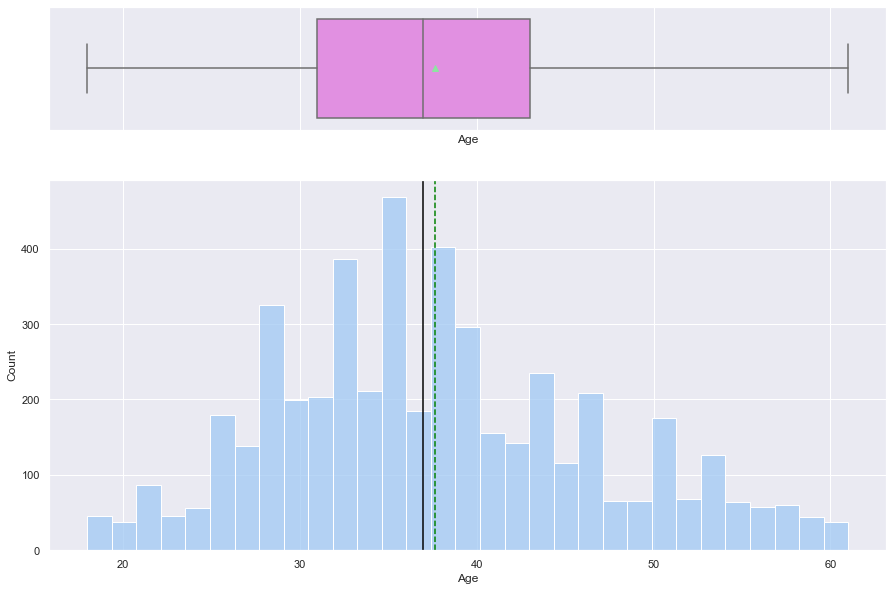

In [27]:
histogram_boxplot(tourism['Age'])

- Data seems to be close to normally distributed.
- Mean age group is 36 and data is left skewed.
- People in late 20s to 40 are major customer.
- Although distribution of age shows most of people are in middle age group but there is significant number for age group 38.

### Observations on DurationOfPitch

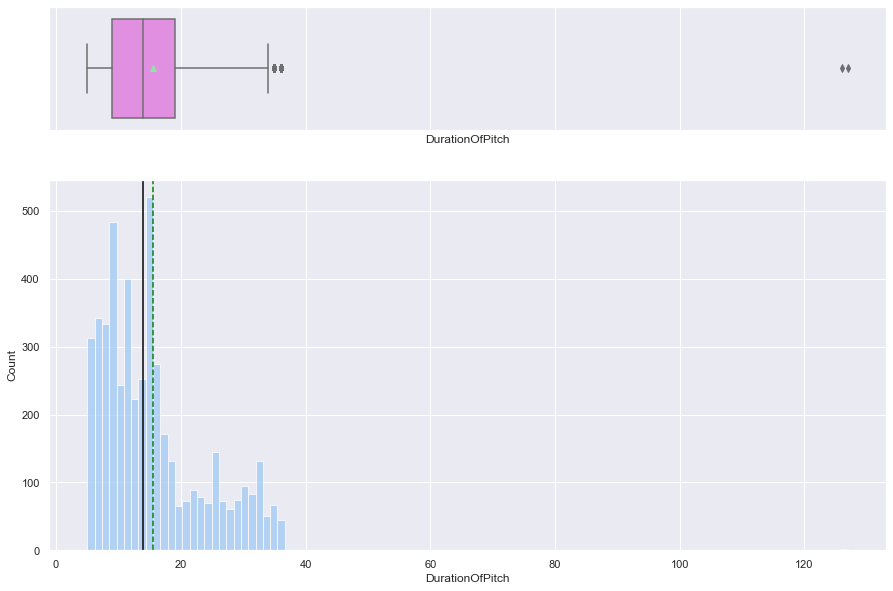

In [28]:
histogram_boxplot(tourism['DurationOfPitch'])

- Data is left skewed.Most of the pitch are ending in less than 19 min.
- Majority of duration is of 15 minutes and 9 minutes.
- There are some outliers, whose duration pitch has gone beyond 40 mins. This may be affecting mean duration of pitch.
- For some of the case duration of pitch is as long as 126 and 127 minutes
- some of the case duration of pitch is less than 5 minutes but there is sudden jump in customer count from 6 minutes onwards.

### Observations on NumberOfPersonVisiting

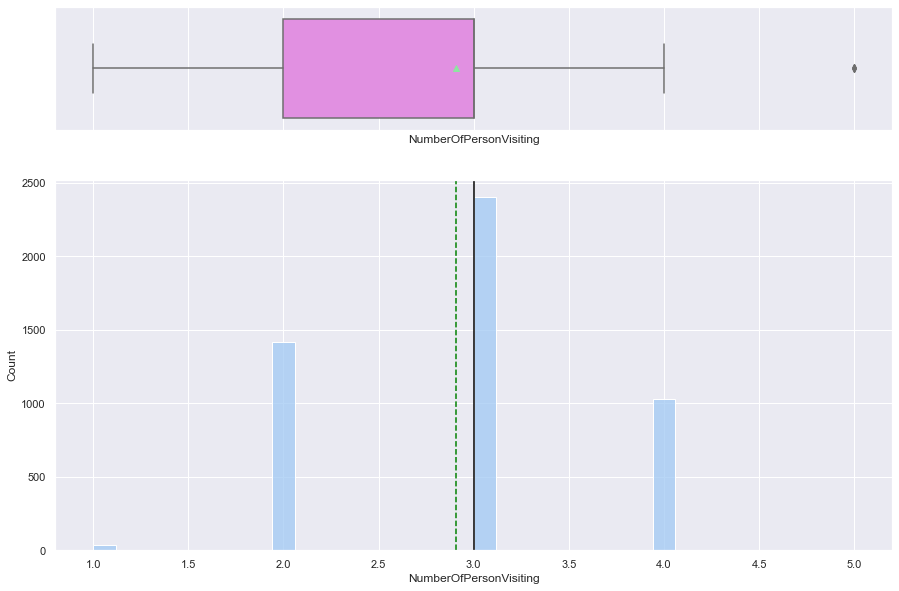

In [29]:
histogram_boxplot(tourism['NumberOfPersonVisiting']) 

- On average 3 people are visting together.Data is slightly right skewed.
- There is small number(0.8%) of solo visitors and also very small number(0.1) of visitors with group of 5 people

### Observations on NumberOfFollowups

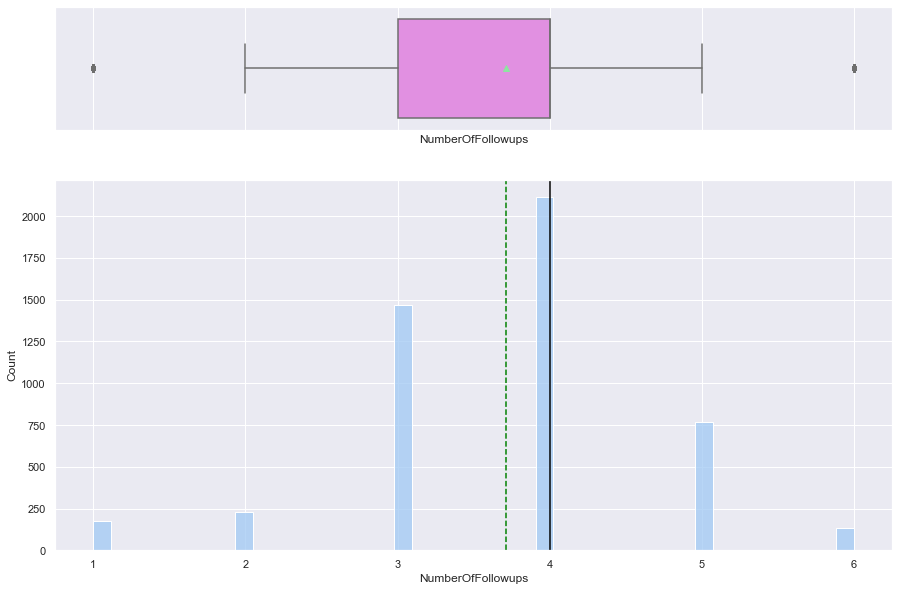

In [30]:
histogram_boxplot(tourism['NumberOfFollowups']) 

- Data is slightly right skewed. Average number of Followups are 4.
- In general, followups are in between 3, 4 and 5 times.
- Trend is increasing from 1 followups to 4 followups and going down.
- 6 followups is unusal, its clearly a outlier.

### Observations on NumberOfTrips

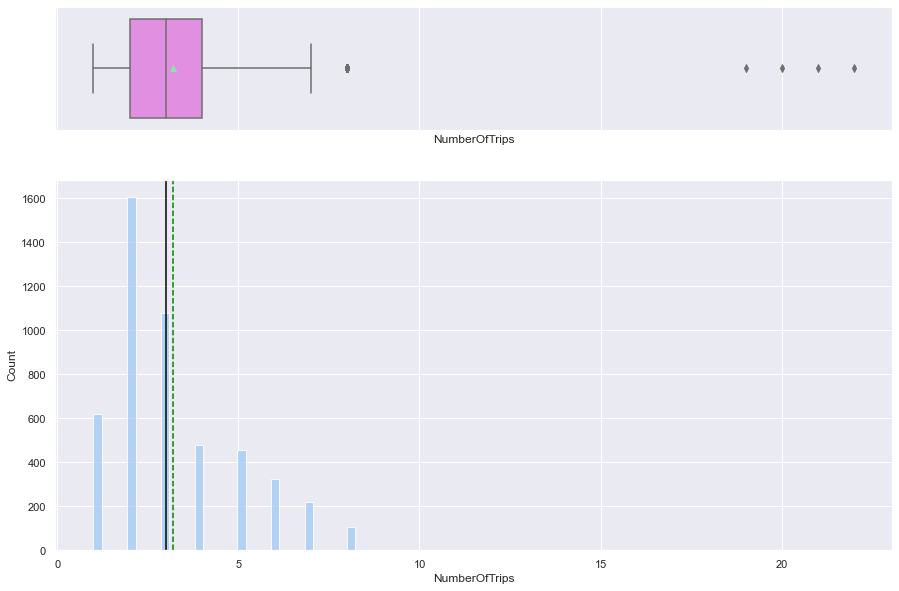

In [31]:
histogram_boxplot(tourism['NumberOfTrips']) 

- Data is slighly right skewed, Average number of people are making 2 trips.
- There are outliers, where people are taking close to 20 trips.
- Outliers records is affecting mean value  number of trips.

### Observations on NumberOfChildrenVisiting

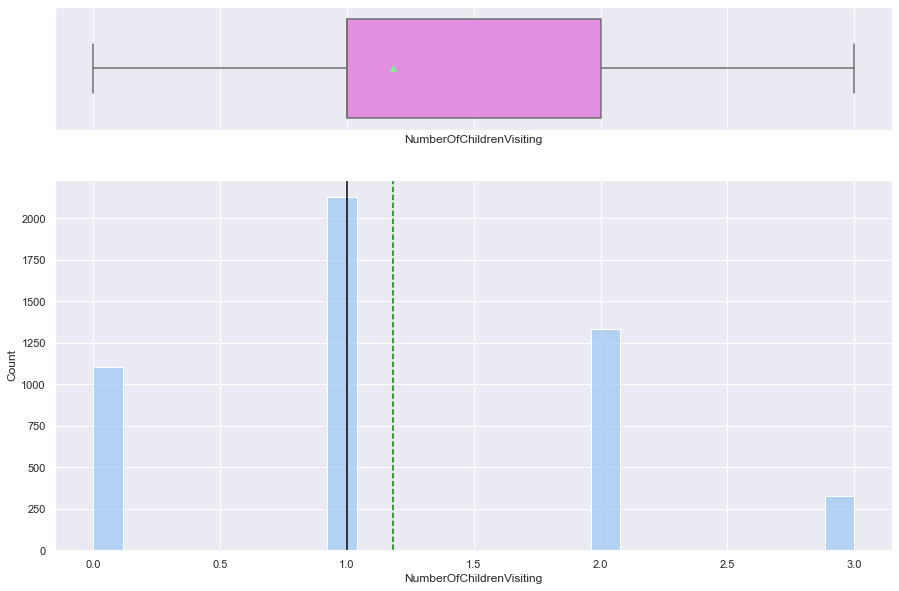

In [32]:
histogram_boxplot(tourism['NumberOfChildrenVisiting']) 

- Number of children visiting is left skewed but it can be said in general mean number of children visiting is 1.
- There are good number of family with no children.

### Observations on MonthlyIncome

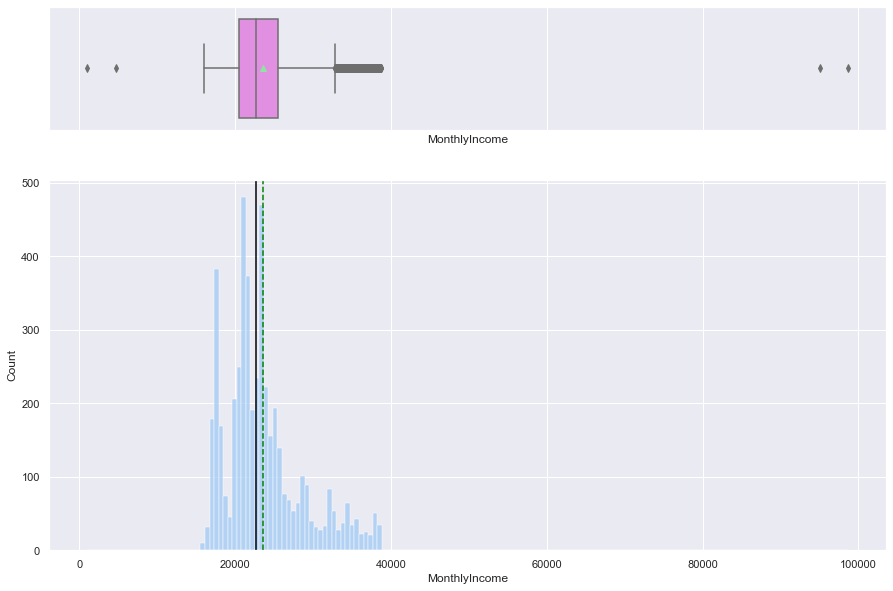

In [33]:
histogram_boxplot(tourism['MonthlyIncome']) 

- Data is slightly left skewed. Average income is close to 23000/month
- There are outliers on both side, some people has monthly income as less as 1000/month,
- There are outliers whose income is more than 32000/month, for some of the people , their monthly income is close to 10000/month

In [34]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar1(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.15 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot
    


In [35]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(tourism[z]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(tourism[z])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on TypeofContact

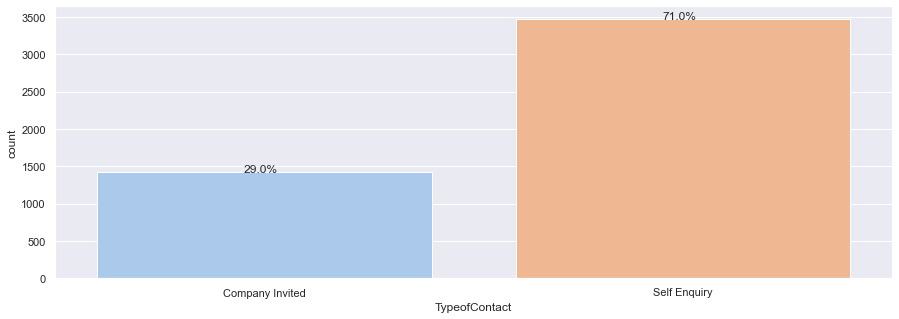

In [36]:
perc_on_bar("TypeofContact")

- Majority of customer is approaching through self inquiry.
- Self inquiry is more than twice as that of company invited.

### Observations on CityTier

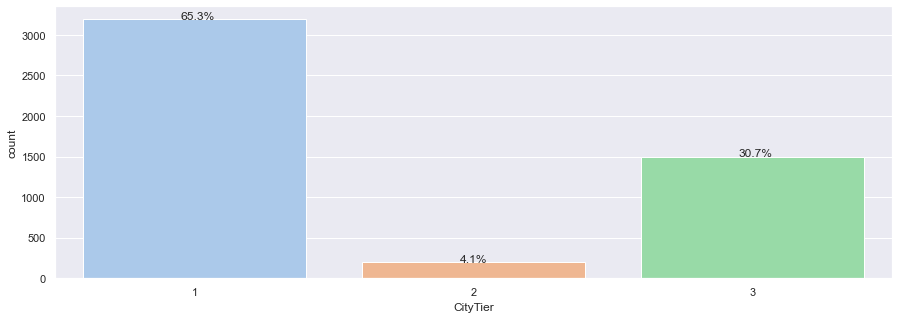

In [37]:
perc_on_bar("CityTier")

- Tier 1 city is most reccords for customer followed by Tier-3 city, which is half as that of Tier-1.
- Customers from Tier - 2 city has very small percentage. This needs to be explored.

### Observations on Occupation

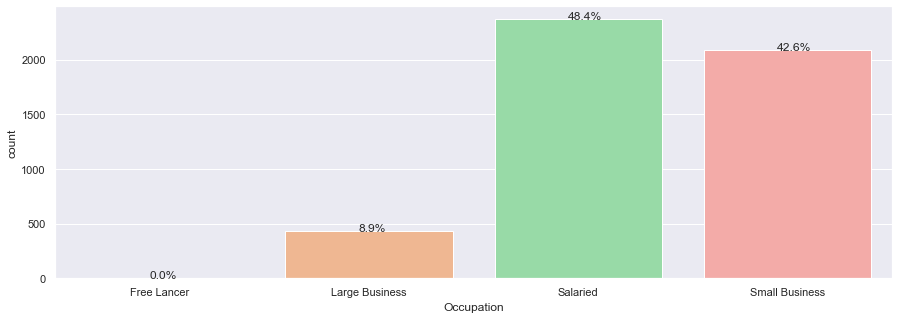

In [38]:
perc_on_bar("Occupation")

- Salaried people representation is highest for tour package followed by Small business.
- There is very small number of customer with Free Lance occupation
- Customer with occupation Large business is also very small.

### Observations on Gender

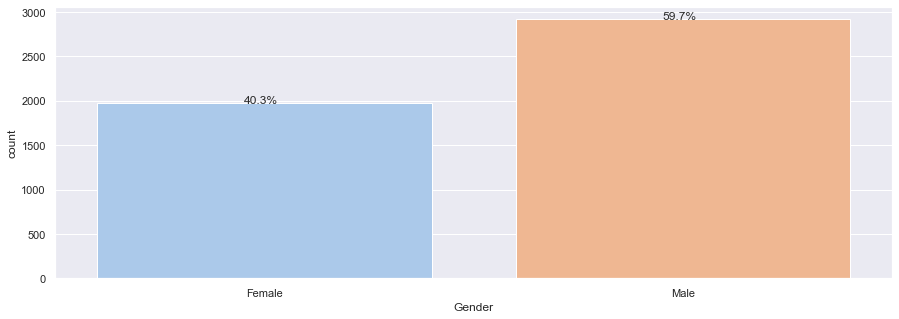

In [39]:
perc_on_bar("Gender")

- Majority of customer are Male(59.7%)
- This may be due to Male being head of household.

### Observations on ProductPitched

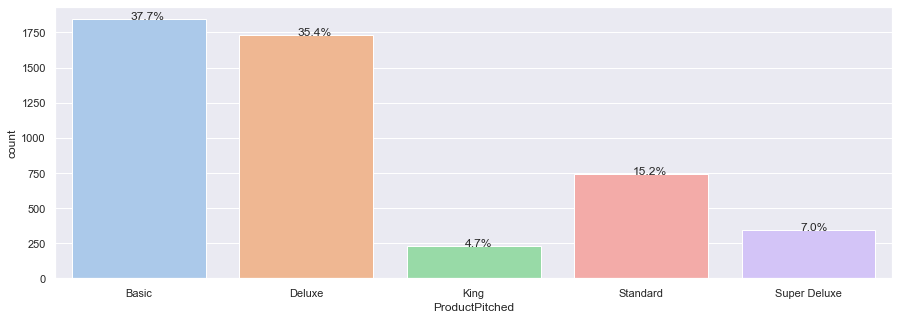

In [40]:
perc_on_bar("ProductPitched")

- Basic product is pitche more often , followed by Delux
- King Product is pitched less often, this may be strategy to push customer towrds Standard and Super Deluxe 

### Observations on PreferredPropertyStar

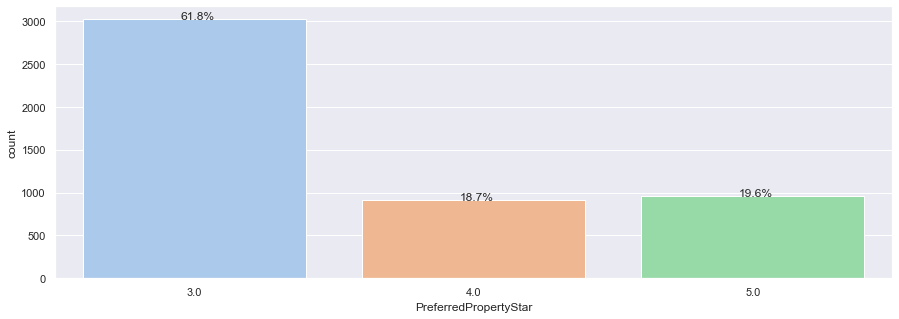

In [41]:
perc_on_bar("PreferredPropertyStar")

- 3 star property is most preferred (61.8%). Most of the traveller are opting for Basic package and 
  average income group.
- 4 and 5 star property is almost equally preferred.
- Infact prefernce of 3 star property is more than combined preference of 4 and 5 star property.

### Observations on MaritalStatus

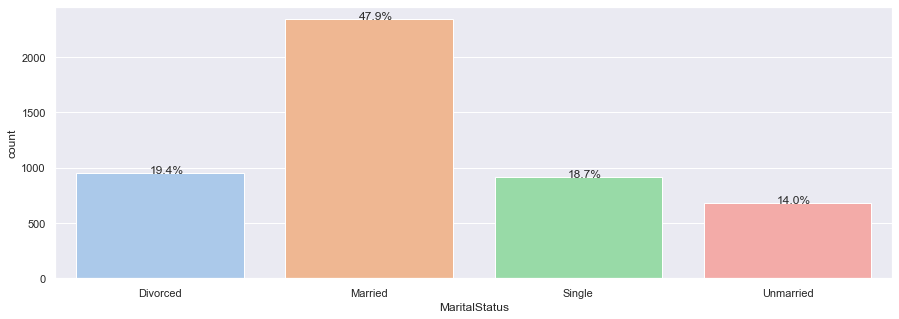

In [42]:
perc_on_bar("MaritalStatus")

- Married people are major customers, they make half of the customer base.
- Demand for package is almost equal for Divorced and Single people.

### Observations on Passport

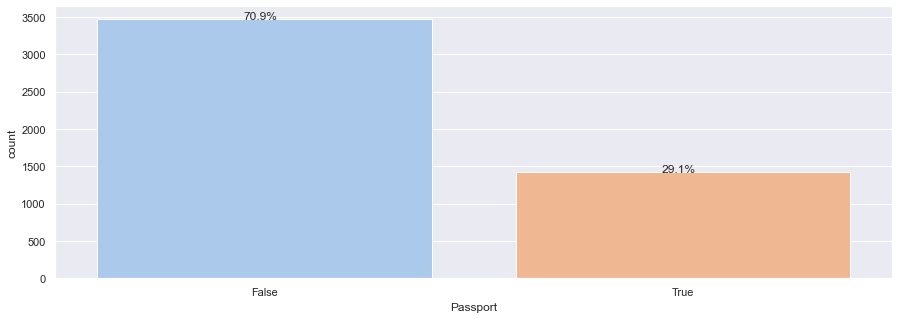

In [43]:
perc_on_bar("Passport")

- Most of the people don't have passport(70.9%). Which is more than twice the percentage of passport holders.
- Majority of customers are domestice travellers. There can be great potential if company add package for 
  passport and visa service.

### Observations on PitchSatisfactionScore

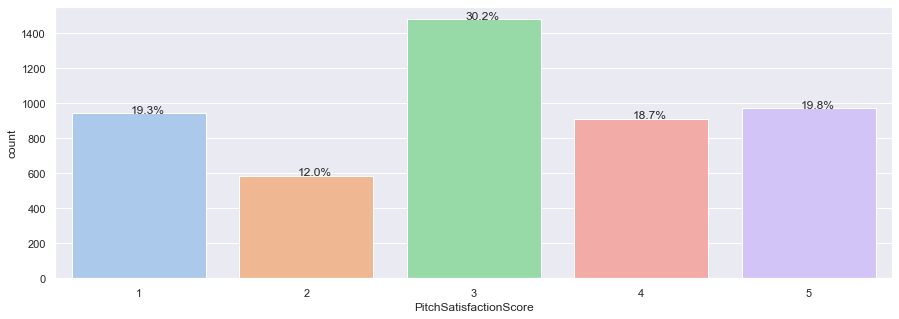

In [44]:
perc_on_bar("PitchSatisfactionScore")

- Majority score of Pitch satisfaction is 3.
- Pitch satisfaction score 1, 4 and 5 are very close.

### Observations on Designation

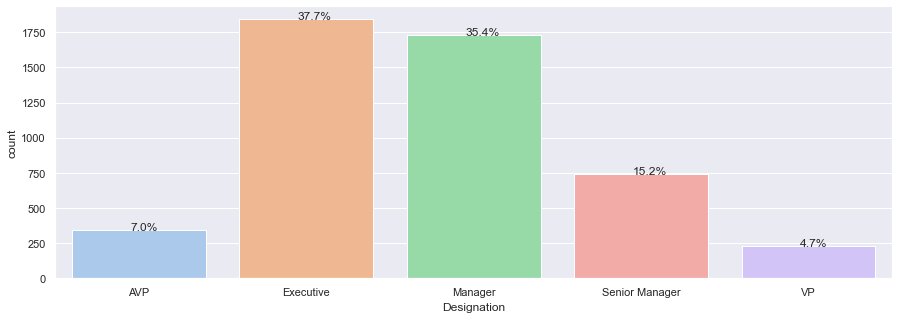

In [45]:
perc_on_bar("Designation")

- Big base of customer are from Executive(37.7%) and Manager(35.4%) then senior Manager(15.2%)
- Surprisingly, VP and AVP has very small percentage. This may be due to their busy schedule. Company should focus on providing very customized package to them.

## Bivariate Analysis
### Coorelation analysis

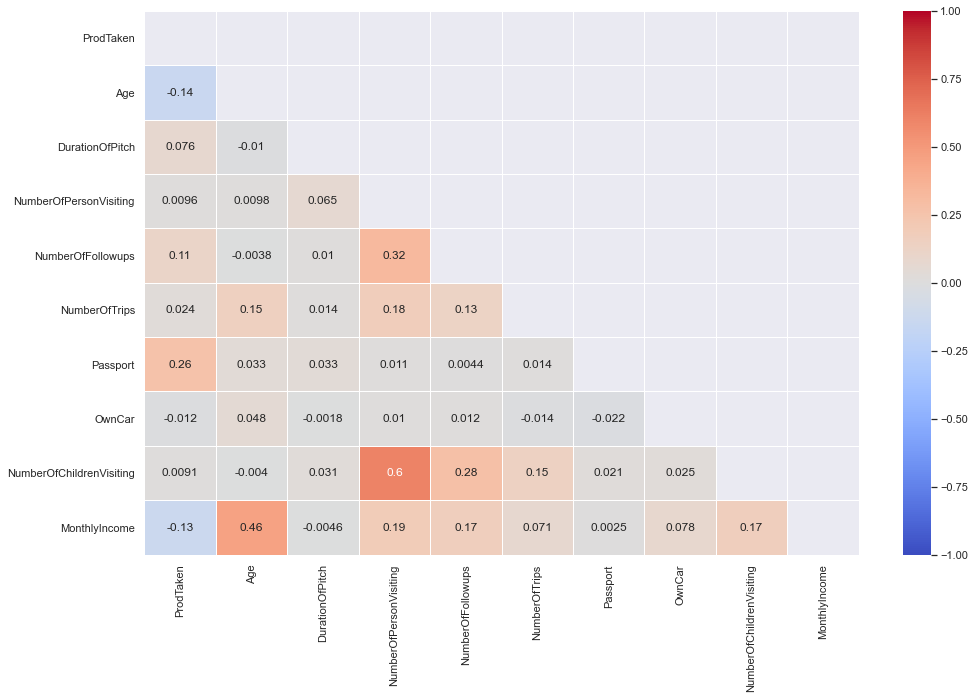

In [46]:
# Below steps  and configuration will create heat map for lower diagonal half only , as we know lower and 
# upper half half contains same value but with differnt order of axis.
def gen_heatmap(corrDF):
    cgf_mask = np.zeros_like(corrDF, dtype=np.bool)
    cgf_mask[np.triu_indices_from(cgf_mask)] = True
    fig, ax = plt.subplots(figsize=(16, 10))
    sns.heatmap(corrDF,  annot=True, mask=cgf_mask, cmap= "coolwarm", vmax=1, vmin=-1, center=-0, 
                     linewidths=1, cbar_kws={"shrink": 1});

tourismCorr = tourism.corr()
gen_heatmap(tourismCorr)


**Observstions**
- There is strong coorelation(0.6) between NumberOFChildrenVisiting vs NumberOfPersonVisiting
- There is strong coorelation(0.46) between MonthlyIncome vs Age.
- There is moderate coorelation between NumberOfPersonVisiting vs NumberOfFollowUps and NumberOfChildrenVisiting(0.32) vs NumberOfFollowUps(0.28)
- Rest of the coorelation is very small in magnitude, therfore it can be ignored.

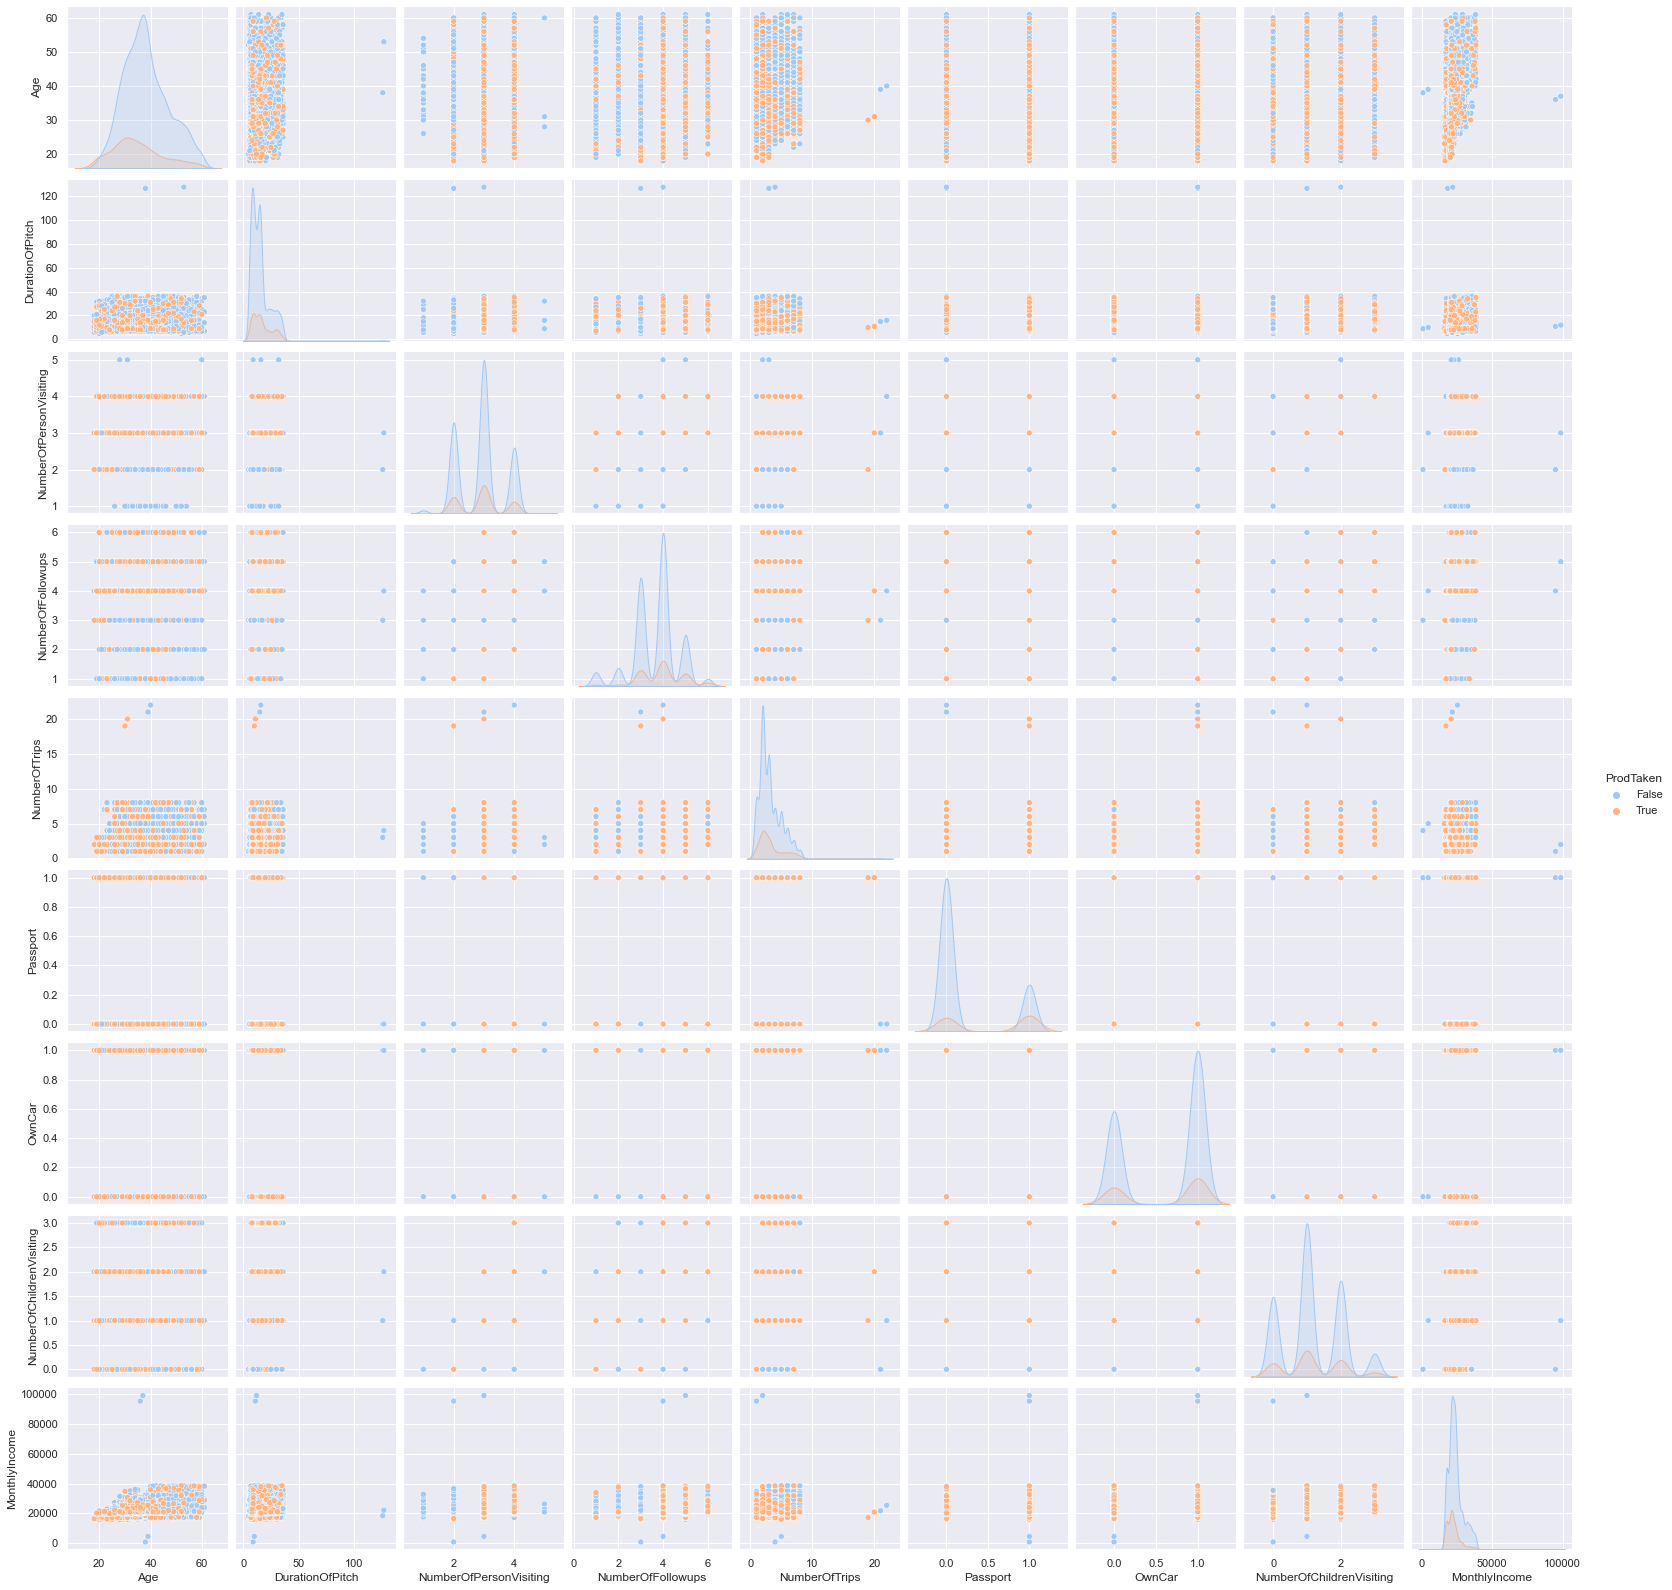

In [47]:
sns.pairplot(data=tourism, hue="ProdTaken")
plt.show()

- Pairplot does not provide much details as ProdTaken and prod not taken are in mixed pattern.Therefore, difficult predict the pattern.

In [48]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(y, x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,y,margins=True)
    print(tab1)
    print('-'*110)
    ## visualising the cross tab
    tab = pd.crosstab(x,y,normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken  False  True   All
Age                         
18.0           6     8    14
19.0          11    21    32
20.0          13    25    38
21.0          18    23    41
22.0          31    15    46
23.0          33    13    46
24.0          38    18    56
25.0          54    20    74
26.0          69    37   106
27.0         108    30   138
28.0         121    26   147
29.0         121    57   178
30.0         151    48   199
31.0         162    41   203
32.0         157    40   197
33.0         149    40   189
34.0         167    44   211
35.0         203    34   237
36.0         204    27   231
37.0         161    24   185
38.0         343    59   402
39.0         136    14   150
40.0         123    23   146
41.0         131    24   155
42.0         122    20   142
43.0         120    10   130
44.0          88    17   105
45.0          98    18   116
46.0         110    11   121
47.0          76    12    88
48.0          54    11    65
49.0          56     9    65
50.0          

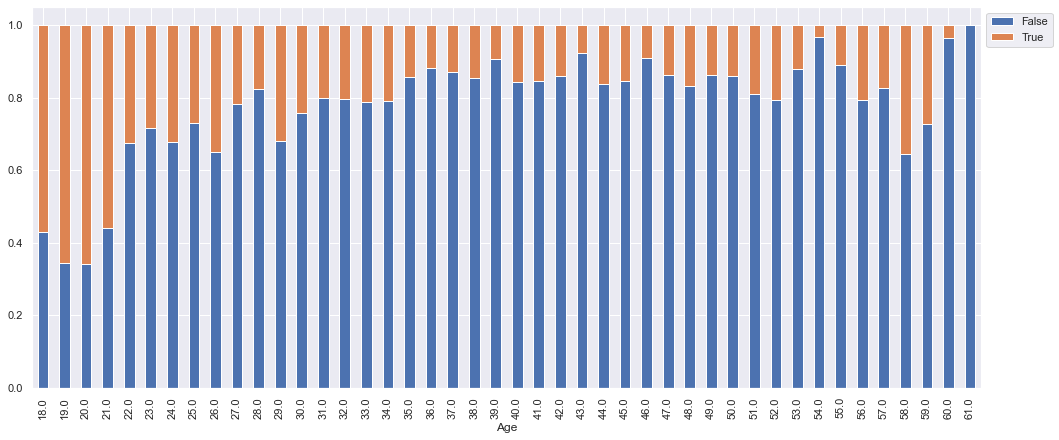

In [49]:
stacked_plot(tourism['ProdTaken'], tourism['Age'])

- Highest number of package are taken among 19 and 20 years of age.
- No one of Age 61 has taken any package.
- Package taken for 18 and 20 year are almost equal and then there is mix response for all other age groups.

ProdTaken        False  True   All
TypeofContact                     
Company Invited   1109   310  1419
Self Enquiry      2859   610  3469
All               3968   920  4888
--------------------------------------------------------------------------------------------------------------


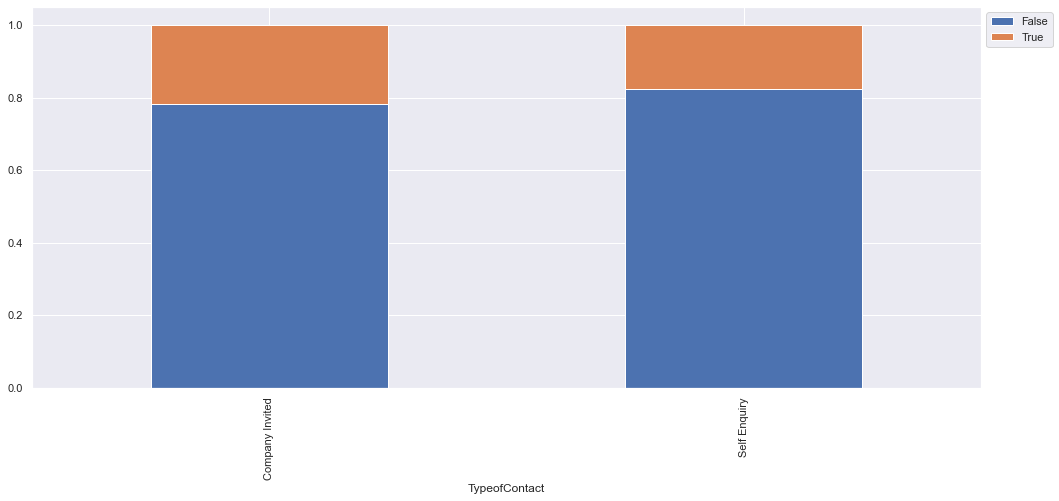

In [50]:
stacked_plot(tourism['ProdTaken'], tourism['TypeofContact'])

- Although ratio of self enquiry is more than company invited but more customer are takign package when through 
  company invited option.

ProdTaken        False  True   All
DurationOfPitch                   
5.0                  6     0     6
6.0                268    39   307
7.0                294    48   342
8.0                273    60   333
9.0                404    79   483
10.0               199    45   244
11.0               168    37   205
12.0               162    33   195
13.0               191    32   223
14.0               212    41   253
15.0               423    97   520
16.0               218    56   274
17.0               148    24   172
18.0                56    19    75
19.0                36    21    57
20.0                46    19    65
21.0                57    16    73
22.0                66    23    89
23.0                58    21    79
24.0                54    16    70
25.0                59    14    73
26.0                60    12    72
27.0                58    14    72
28.0                44    17    61
29.0                53    21    74
30.0                65    30    95
31.0                

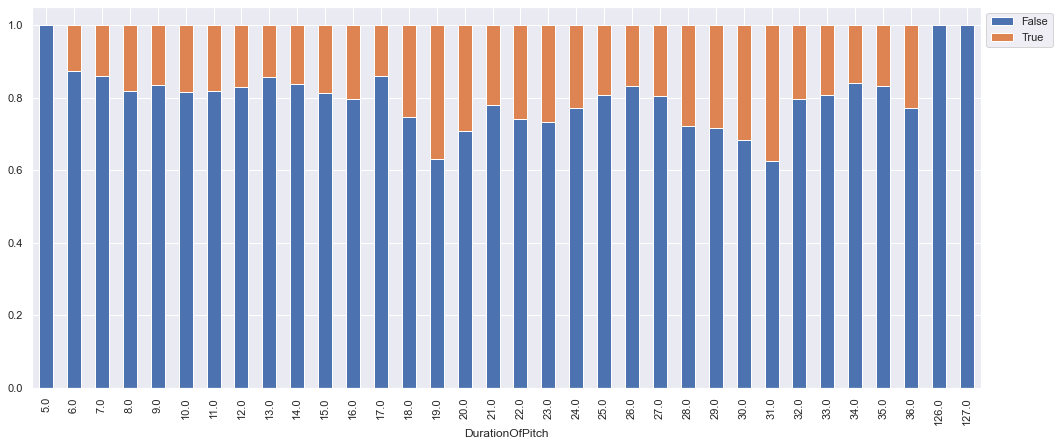

In [51]:
 stacked_plot(tourism['ProdTaken'], tourism['DurationOfPitch'])

- Highest number of success rate with customer is when durationOfPitch is 19 and 31 minutes
- There is no sucess with duration of Pitch 5 minutes or less
- Surprisingly, customer didn't tooka any package even thorugh duration of pitch was 126 and 127 minutes.

ProdTaken       False  True   All
Occupation                       
Free Lancer         0     2     2
Large Business    314   120   434
Salaried         1954   414  2368
Small Business   1700   384  2084
All              3968   920  4888
--------------------------------------------------------------------------------------------------------------


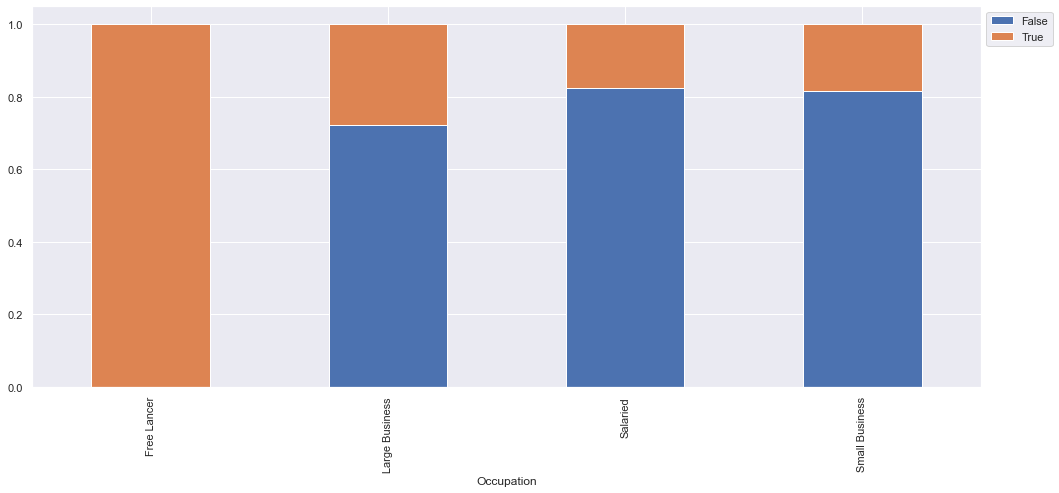

In [52]:
stacked_plot(tourism['ProdTaken'], tourism['Occupation'])

- All customer with freelancing occupation has taken the package.
- Customer with Salaried and Business occupation has almost equal ratio.

ProdTaken               False  True   All
PitchSatisfactionScore                   
1                         798   144   942
2                         498    88   586
3                        1162   316  1478
4                         750   162   912
5                         760   210   970
All                      3968   920  4888
--------------------------------------------------------------------------------------------------------------


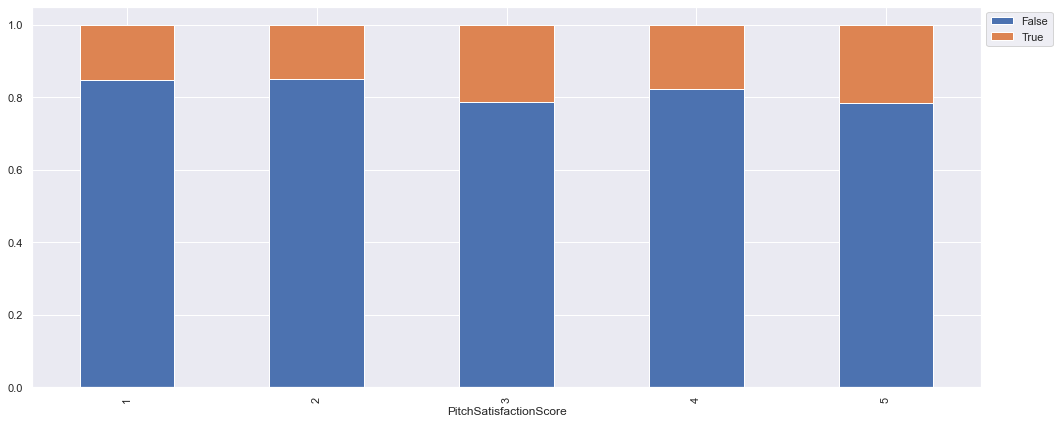

In [53]:
stacked_plot(tourism['ProdTaken'], tourism['PitchSatisfactionScore'])

- When Pitch satisfaction score is 3 or 5 customer are opting for package. 
- For pitch score 4 , customer opting for package is almost equal to pitchsatisfaction score 3 and 5
- For Pitch satisfaction score 1 and 2, customer opting products almost are equal.

ProdTaken       False  True   All
ProductPitched                   
Basic            1290   552  1842
Deluxe           1528   204  1732
King              210    20   230
Standard          618   124   742
Super Deluxe      322    20   342
All              3968   920  4888
--------------------------------------------------------------------------------------------------------------


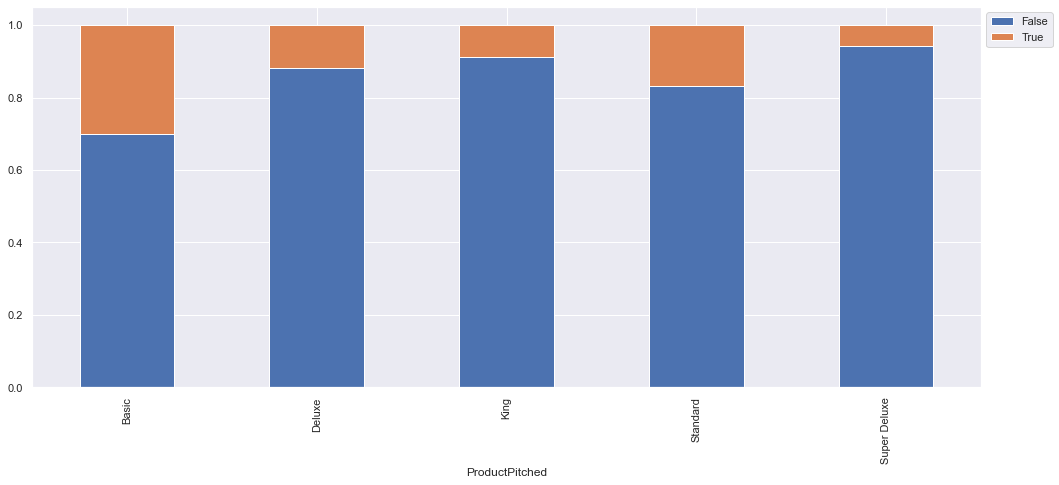

In [54]:
stacked_plot(tourism['ProdTaken'], tourism['ProductPitched'])

- Most of the customer opted for Basic product.
- Second most opted prouct is stanadrd. 
- Super delux is least opted product.

ProdTaken          False  True   All
NumberOfFollowups                   
1.0                  156    20   176
2.0                  205    24   229
3.0                 1222   244  1466
4.0                 1726   387  2113
5.0                  577   191   768
6.0                   82    54   136
All                 3968   920  4888
--------------------------------------------------------------------------------------------------------------


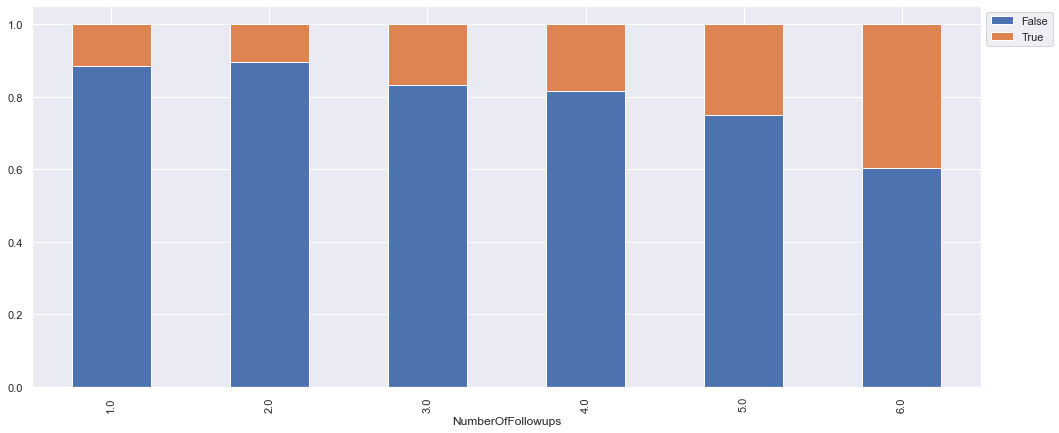

In [55]:
stacked_plot(tourism['ProdTaken'], tourism['NumberOfFollowups']) 

- Number of followups with package taken has good coorelation
- 1 and 2 follow ups have same proportion of success rate , similarly 3 and 4 has same success rate which is more than previous followups 
- 5 followups are success rate is more than its previosu followups.
- 6 followups has highest number of success rate.

ProdTaken  False  True   All
CityTier                    
1           2670   520  3190
2            152    46   198
3           1146   354  1500
All         3968   920  4888
--------------------------------------------------------------------------------------------------------------


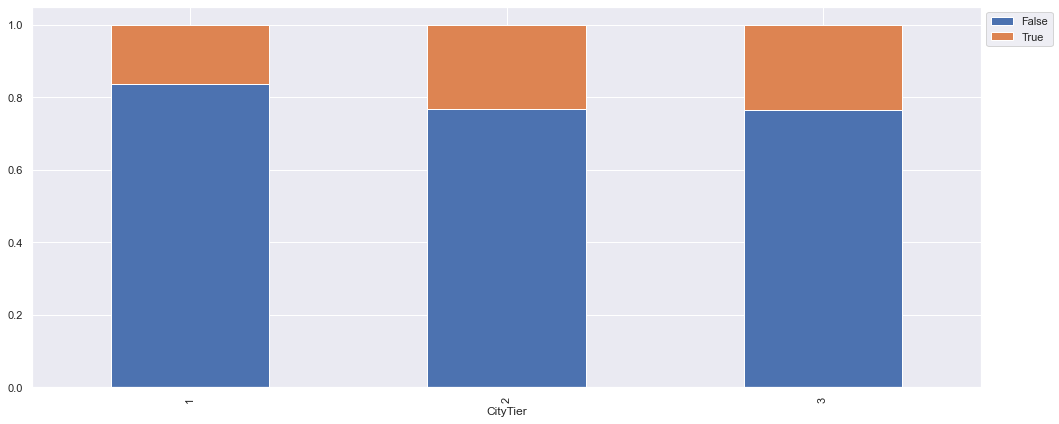

In [56]:
stacked_plot(tourism['ProdTaken'], tourism['CityTier']) 

- Customer in City tier 2 and 3 are taking package in same proportion
- However, customer from Tier 1 city are taking package in less proportion than other two cities.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There is no duplicate values in the dataset.
- There are  missing values for Age, TypeOfContact, DurationOfSpeech, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome
- We imputed the missing values based of feature property,  Mode or Mean 
- Most of the data-types are either **int64** or **float64** or **object**
- We converted `CityTier` , `Occupation`,  `ProductPitched` , `PreferredPropertyStar` , `MaritalStatus` , `PitchSatisfactionScore`,  `Designation`  type category 
- We converted `Passport`, `OwnCar`, `ProdTaken`, `Gender` and `TypeofContact` to type boolean

**Data Cleaning:**

* There  misspelled  Female as "Fe Male”, we fixed it with right value
* We observed that there is null value assigned for  NumberOfChildrenVisiting for maritalStatus single, which we replaced with 0 and remaining was replaced with mode value.
* We replaced missing PreferredPropertyStar, NumberOfFollowups and NumberOfTrips with mode values.
* We replaced missing DurationOfPitch with rounded mean value.
* We replaced missing Age with rounded mean value , because all existing age was rounded to integer value.
* We replaced missing MonthlyIncome with mean value.

**Observations from EDA:**

* `Age`: 
    * Representation of people from middle age group is highest.
    * Cutomer with Age group 18-22 are taking package more than any other age group.
    * There is no fixed trend in other age groups , company should put effort in study this pattern.
    
* `DurationOfPitch`:  
	* Maximum number for Duration of Pitch is 15 min. This trend is upward and starting from 5 min then it is reducing after 17 min. 
    * There is mix of success with duration of Pitch.
	*  Marketing people should be trained to understand the customer tone and body language and accordingly introduce the various package.

* `NumberOfPersonVisiting`:  
	* Average number of person visiting in groups is 3. there is also solo visitors and very small number of customers with group of 5 people.

* `NumberOfFollowups`:
	* Number of followups with package taken has good correlation. As the followups are increasing  number of customers taking the package is also increasing.

* `NumberOfTrips`:  
	* Majority of customers  are taking 2 trips but there are small number of customers who has taken 19 to 22 trips.

* `NumberOfChildrenVisiting`:  
	* Majority of the customer has only  one children. Some family don’t have any children,  Very small number of family has 3 children.

* `MonthlyIncome`: 
	* Average income for customer is 23000/monthly but  there  are many customers who are in high income group.

* `TypeofContact`:
    * Most of the people are approaching through self Enquiry. However, conversion rate to buy the package is less then Company invited approach.
     
* `CityTier`: 
	* Customer in Tier 1 city are taking tour package less than Tier 2 and 3 package.

* `Occupation`:
    * Majority of customer is salaried customer. 
    * Free lancer are motivated because they don’t have fixed working location. They might be clubbing together trip with work requirement. We can such customer because their package purchase rate is 100%.

* `Gender`:  
    * Major customer base is male that may be because male are head of household and they are approching Tour companies.

* `ProductPitched`:  
    *  Most of the time sale pitched by company  for basic and deluxe type

* `PreferredPropertyStar`:  
    *  Majority of customer prefer property with rating 3.  
    
* `MaritalStatus`:  
    * Majority of customer are with status married. They may be motivated to spend quality time and it is lot easier to plan the tour.

* `Passport`:  
    *  Majority of customer don’t have passport.

* `PitchSatisfactionScore`:  
    *  Majority pitch satisfaction score is 3 which can be considered neutral reaction.
    *  But satisfaction score of 4 and 5 can be catered good sign and together they make 39% 
    *  Proportion of customer opting for tour package is more in case of pitch score 3,4 and 5.

* `Designation`:  
    * Major group of customers are from executive and manager category.
    * However , there is small percentage of customers are from AVP and VP category.
    
**Actions for data pre-processing:**

* We'll drop Customer ID  column  as it was just for row tracking purpose. 
* We’ll apply one hot encoding for all categorical columns `CityTier`, `PreferredPropertyStar`, `PitchSatisfactionScore`, `Occupation`,`ProductPitched`,`MaritalStatus","Designation`.

### Data Preparation

In [57]:
# Restructure all categorical variable and assign appropriate numeric values
replaceStruct = {
                 "TypeofContact": {"Self Enquiry": 0, "Company Invited": 1 },
                 "Occupation": {"Salaried": 1, "Small Business":2 , "Large Business": 3, "Free Lancer": 4},
                 "Gender": {"Male": 0, "Female":1},
                 "ProductPitched": {"Basic": 1, "Deluxe": 2 ,"Standard": 3 ,"Super Deluxe": 4 ,"King": 5}, 
                 "MaritalStatus": {"Married": 1, "Divorced": 2 ,"Single": 3, "Unmarried": 4},
                 "Designation": {"Executive": 1, "Manager": 2 ,"Senior Manager": 3, "AVP": 4, "VP": 5}
                }
# List all category types, these will be converted to one hot encoding
oneHotCols=["CityTier", "PreferredPropertyStar", "PitchSatisfactionScore", "Occupation","ProductPitched","MaritalStatus","Designation"]

In [92]:
tourism=tourism.replace(replaceStruct)
tourismData=pd.get_dummies(tourism, columns=oneHotCols)
tourismData.head(10)

TypeError: Cannot compare types 'ndarray(dtype=bool)' and 'str'

In [59]:
#Converting TypeofContact and Gender to type boolean. We'll not consider this for one hot encoding
tourism['TypeofContact'] =  tourism['TypeofContact'].astype('bool')
tourism['Gender'] =  tourism['Gender'].astype('bool')

In [60]:
tourismData.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ProdTaken                  4888 non-null   bool   
 1   Age                        4888 non-null   float64
 2   TypeofContact              4888 non-null   int64  
 3   DurationOfPitch            4888 non-null   float64
 4   Gender                     4888 non-null   int64  
 5   NumberOfPersonVisiting     4888 non-null   int64  
 6   NumberOfFollowups          4888 non-null   float64
 7   NumberOfTrips              4888 non-null   float64
 8   Passport                   4888 non-null   bool   
 9   OwnCar                     4888 non-null   bool   
 10  NumberOfChildrenVisiting   4888 non-null   float64
 11  MonthlyIncome              4888 non-null   float64
 12  CityTier_1                 4888 non-null   uint8  
 13  CityTier_2                 4888 non-null   uint8

**Observation**
     * Now total number of features 33, Customer ID columns is dropped.
     * All missing values for features are treated and replaced with appropriate values.
     DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields CityTier, PreferredPropertyStar, PitchSatisfactionScore


### Split Data

In [61]:
# Features
X = tourismData.drop("ProdTaken", axis=1)
# Labels (Target Variable): converting target to integers 
y = tourismData["ProdTaken"].astype("bool")

In [62]:
# Splitting data into training and test set:
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 40) (1467, 40)


## Model evaluation criterion

### Model can make wrong predictions as:
    1. Predicting customer will take tour package but he doesn't take the package.
    2. Predicting customer will not take tour package but he takes the package.

### Which case is more important? 
    1. If a model predicts that a customer will not take product but he takes the product. In this case marketing prople is not approaching the customer with package details. There is no loss in this case and many times people are taking package through self enquiry.
    2. If a model predicts that a customer will take a product but he doesn't takes the product then marketing people is approaching customer who will not take any package. Since merketing cost is high, this may result in loss for company.

### Which metric to optimize?
    * We would want `Precision` should be maximized, the greater the Precison higher the chances of identifying potential customer

In [63]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [64]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9045671438309475
Recall on training set :  1.0
Recall on test set :  0.7282608695652174
Precision on training set :  1.0
Precision on test set :  0.7556390977443609
F1-Score on training set :  1.0
F1-Score on test set :  0.7416974169741697


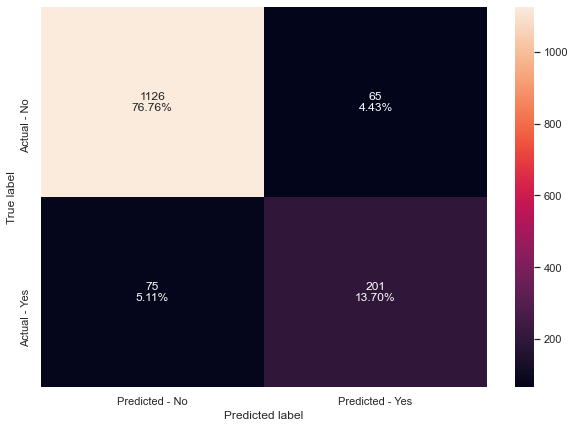

In [65]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

* Decision tree is overfitting the training data.
* We'll try hyperparameter tuning with decision tree.

### Hyperparameter Tuning

In [66]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Accuracy on training set :  0.7956737795966092
Accuracy on test set :  0.8029993183367417
Recall on training set :  0.6475155279503105
Recall on test set :  0.6630434782608695
Precision on training set :  0.46906636670416196
Precision on test set :  0.48284960422163586
F1-Score on training set :  0.5440313111545988
F1-Score on test set :  0.5587786259541985


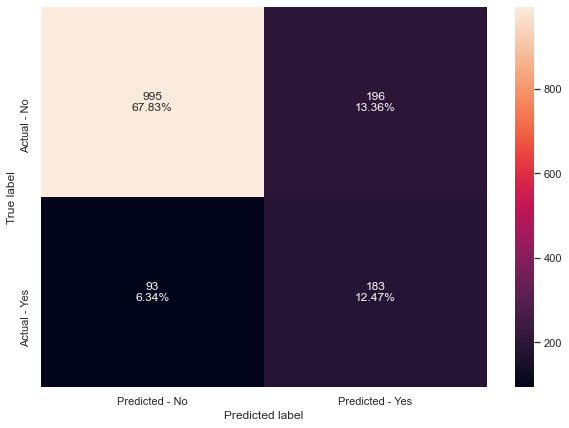

In [67]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

* There is no Overfitting now but Precision score has also reduced. We trgetting fro its maximization.
* We'll try Random forest classifier now.

## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9195637355146558
Recall on training set :  1.0
Recall on test set :  0.6195652173913043
Precision on training set :  1.0
Precision on test set :  0.9293478260869565
F1-Score on training set :  1.0
F1-Score on test set :  0.7434782608695651


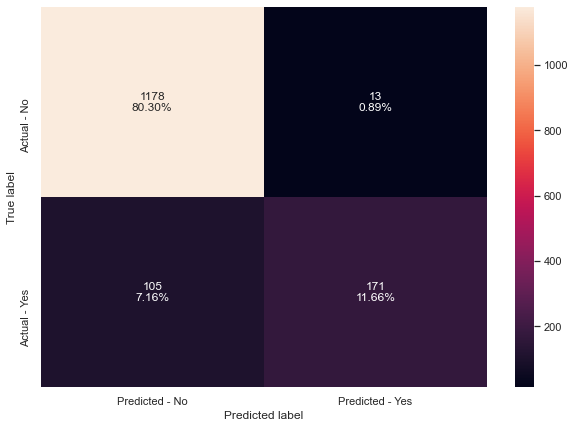

In [68]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

* Random forest is giving best score so far but its overfitting on training data set.
* We'll try hyperparameter tuning with random forest classifier now.

### Hyperparameter Tuning

In [69]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=20,
                       max_features=None, min_samples_split=7, n_estimators=90,
                       oob_score=True, random_state=1)

Accuracy on training set :  0.9953230049693073
Accuracy on test set :  0.9093387866394002
Recall on training set :  0.9984472049689441
Recall on test set :  0.6485507246376812
Precision on training set :  0.9772036474164134
Precision on test set :  0.8325581395348837
F1-Score on training set :  0.9877112135176652
F1-Score on test set :  0.7291242362525457


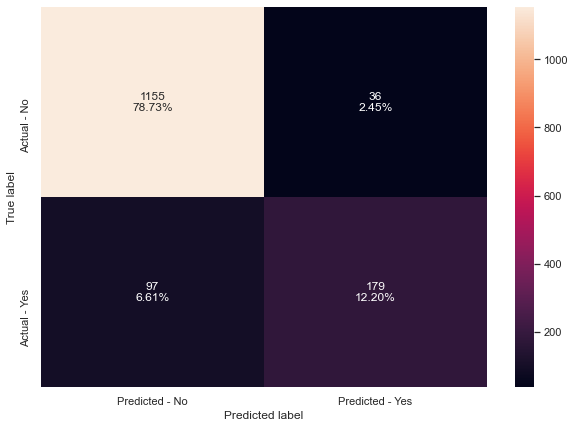

In [70]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

* Test score is less than untuned random forest classifier but overfitting has reduce slightly.
* We'll try bagging classifier now.

## Bagging Classifier

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.907293796864349
Recall on training set :  0.9704968944099379
Recall on test set :  0.6123188405797102
Precision on training set :  0.9984025559105432
Precision on test set :  0.8535353535353535
F1-Score on training set :  0.984251968503937
F1-Score on test set :  0.7130801687763713


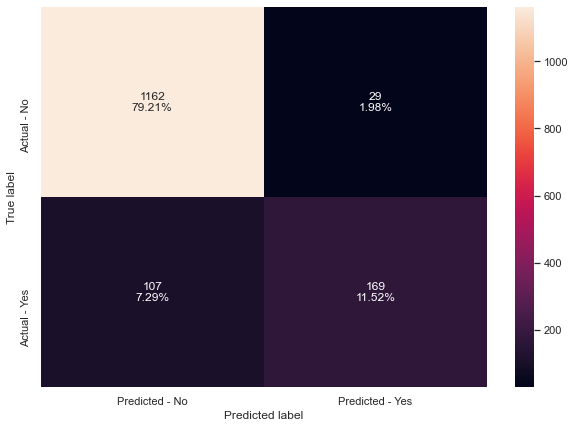

In [71]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

* Bagging classifier is overfitting on training data. Test score is not better than Rnadom forest classifier.
* We'll try tuned Bagging classifier model now.

### Hyperparameter Tuning

In [72]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9263803680981595
Recall on training set :  0.9984472049689441
Recall on test set :  0.6557971014492754
Precision on training set :  1.0
Precision on test set :  0.9329896907216495
F1-Score on training set :  0.9992229992229993
F1-Score on test set :  0.7702127659574468


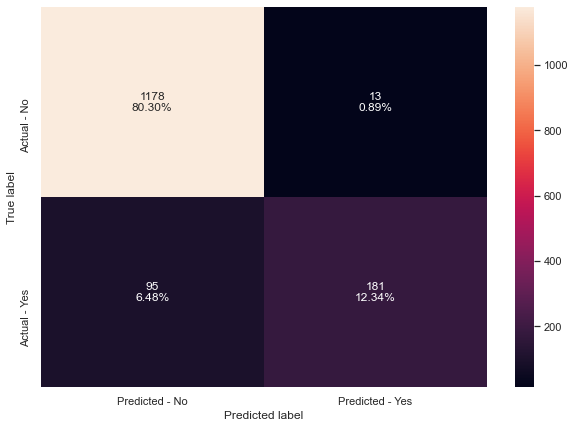

In [73]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

* Tuned Bagging classifier is Overfitting on Training data athough there is improvement in Precision score.
* We'll try AdaBoost classifier now.

## AdaBoost Classifier

Accuracy on training set :  0.8412744811458638
Accuracy on test set :  0.8425357873210634
Recall on training set :  0.3136645962732919
Recall on test set :  0.3188405797101449
Precision on training set :  0.6666666666666666
Precision on test set :  0.6717557251908397
F1-Score on training set :  0.42661034846884893
F1-Score on test set :  0.43243243243243246


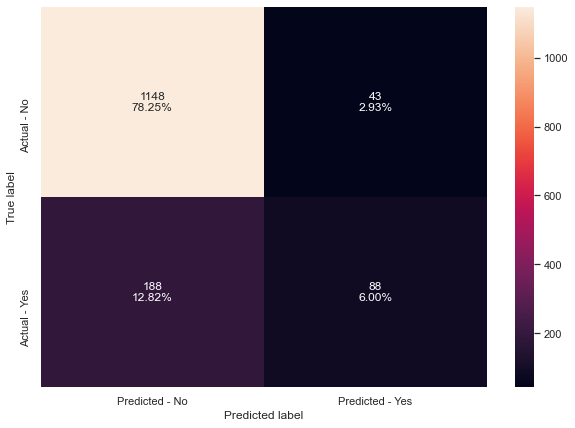

In [74]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

* Training and Test data is not Overfitting but Precision score we are getting is very low.
* We'll try tuned AdaBoost classifier model now.

### Hyperparameter Tuning

In [75]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.1, n_estimators=100, random_state=1)

Accuracy on training set :  0.9888921368021046
Accuracy on test set :  0.8738922972051807
Recall on training set :  0.953416149068323
Recall on test set :  0.6014492753623188
Precision on training set :  0.9871382636655949
Precision on test set :  0.6887966804979253
F1-Score on training set :  0.9699842022116903
F1-Score on test set :  0.6421663442940039


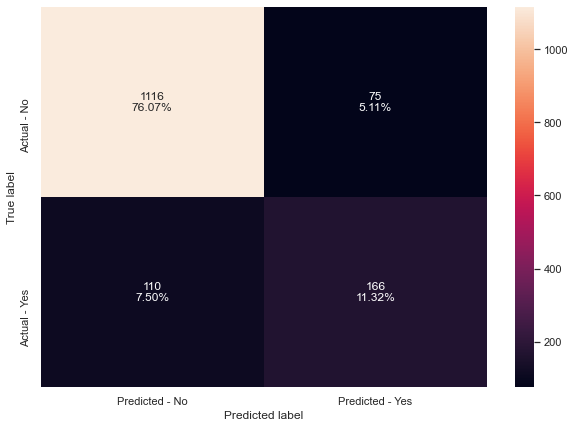

In [76]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

* There is improvement in Precision score for Training and Test data but Mode is Overfitting on Training data.
  In all model performace has decreased.
* We'll try Gradient Boosting Classifier.

## Gradient Boosting Classifier

Accuracy on training set :  0.8857059339374452
Accuracy on test set :  0.8725289706884799
Recall on training set :  0.45652173913043476
Recall on test set :  0.42028985507246375
Precision on training set :  0.8776119402985074
Precision on test set :  0.8111888111888111
F1-Score on training set :  0.6006128702757916
F1-Score on test set :  0.5536992840095465


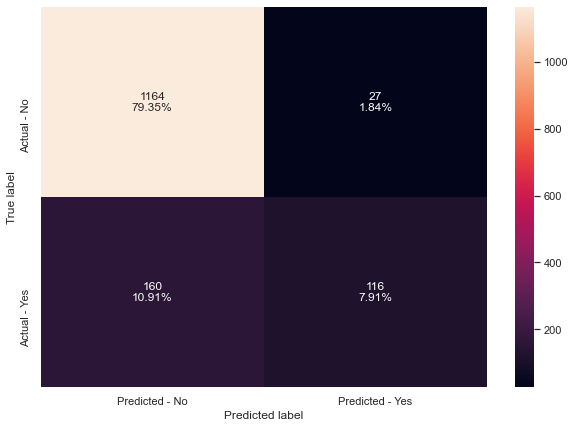

In [77]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

* Mode is Overfitting on training data for Precision score.
* We'll try tuned Gradient Boost Classifier now.

### Hyperparameter Tuning

In [78]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

Accuracy on training set :  0.9216603332358959
Accuracy on test set :  0.8847989093387867
Recall on training set :  0.6195652173913043
Recall on test set :  0.5072463768115942
Precision on training set :  0.9454976303317536
Precision on test set :  0.8092485549132948
F1-Score on training set :  0.7485928705440901
F1-Score on test set :  0.623608017817372


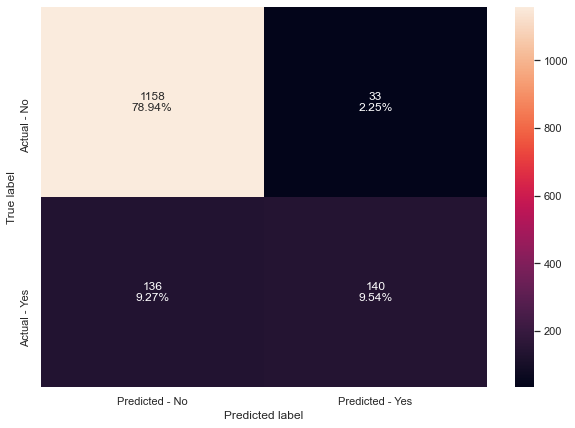

In [79]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

* Training data Precision score has improved but test data score has decreased. In all model performance has decreased and it is Overfitting on training data.
* We'll  try XGBoost Classifier.

## XGBoost Classifier

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9222903885480572
Recall on training set :  0.9984472049689441
Recall on test set :  0.6847826086956522
Precision on training set :  1.0
Precision on test set :  0.875
F1-Score on training set :  0.9992229992229993
F1-Score on test set :  0.7682926829268292


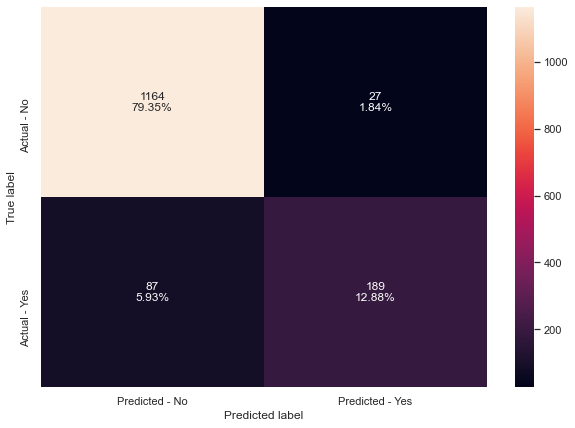

In [80]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

* Clearly, XGBoost classifier data is Overfitting on Training data set.
* We'll try tuned XGBoost Classifier model now.

### Hyperparameter Tuning

In [81]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9678456591639871
Accuracy on test set :  0.9004771642808452
Recall on training set :  0.9922360248447205
Recall on test set :  0.7971014492753623
Precision on training set :  0.8588709677419355
Precision on test set :  0.7096774193548387
F1-Score on training set :  0.9207492795389048
F1-Score on test set :  0.7508532423208191


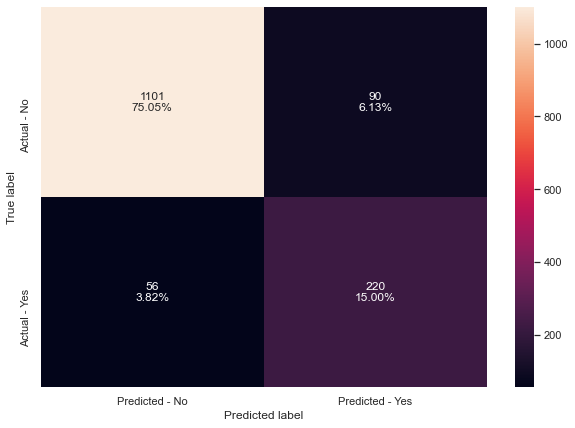

In [82]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

* Although Overfitting has improved slightly on Precision score but model is still Overfitting on training data.

## Stacking Classifier

In [83]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=20,
                                                       max_features=None,
                                                       min_samples_split=7,
                                                       n_estimators=90,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                    

Accuracy on training set :  0.9731072785735165
Accuracy on test set :  0.8922972051806408
Recall on training set :  0.9937888198757764
Recall on test set :  0.822463768115942
Precision on training set :  0.8791208791208791
Precision on test set :  0.6755952380952381
F1-Score on training set :  0.9329446064139941
F1-Score on test set :  0.7418300653594773


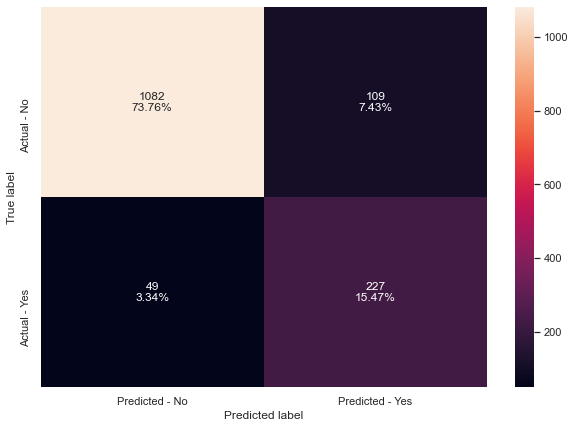

In [84]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

* There is not much improvement in Overfitting of Precision score with compared to tuned XGBoost Model. 
* Infact, Overall score has not changed much for Recall, Accuracy and F1-Score for Training and Test data. 

## Comparing all models

In [85]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [86]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
5,Bagging Classifier Tuned,1.00,0.93,1.00,0.66,1.00,0.93,1.00,0.77
10,XGBoost Classifier,1.00,0.92,1.00,0.68,1.00,0.88,1.00,0.77
11,Tuned XGBoost Classifier,0.97,0.90,0.99,0.80,0.86,0.71,0.92,0.75
2,Random Forest,1.00,0.92,1.00,0.62,1.00,0.93,1.00,0.74
12,Stacking Classifier,0.97,0.89,0.99,0.82,0.88,0.68,0.93,0.74
0,Decision Tree,1.00,0.90,1.00,0.73,1.00,0.76,1.00,0.74
3,Tuned Random Forest,1.00,0.91,1.00,0.65,0.98,0.83,0.99,0.73
4,Bagging Classifier,0.99,0.91,0.97,0.61,1.00,0.85,0.98,0.71
7,Tuned AdaBoost Classifier,0.99,0.87,0.95,0.60,0.99,0.69,0.97,0.64
9,Tuned Gradient Boosting Classifier,0.92,0.88,0.62,0.51,0.95,0.81,0.75,0.62


* Majority of the models are overfitting the training data in terms of Precision score.
* Random Forest and Bagging classifier is giving the highest Precision score on the test data but is overfitting the training data.
* The AdaBoost Classifier is giving more generalized performance among all the classifier models. 

### Feature importance of AdaBoost Classifier

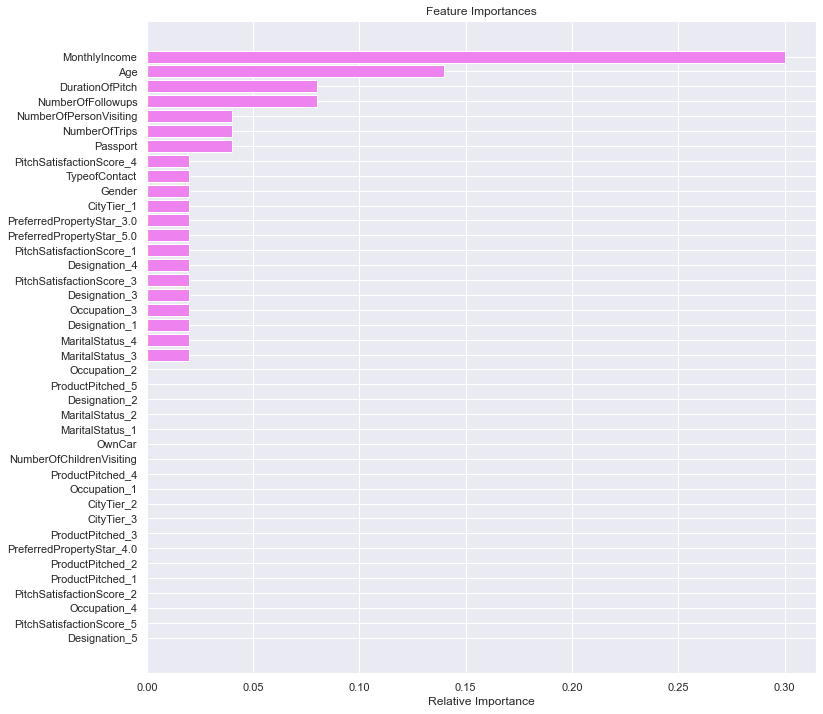

In [91]:
feature_names = X_train.columns
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* MonthlyIncome is the most important feature in identifying the customer for tour package followed by Age, DurationOfPitch and NumberOfFollowups.

### Recommendations
* Company should put effort to understand the behaviors of middle age groups to target them for their product. 
* Marketing people should be trained to understand the customer tone and body language to keep them engaged and understand their requirement and purpose of tourism.
* Marketing team should provide option to further customize the product for different group of peoples.
* NumberOfFollowups is encouraging customer to take packages but to avoid overdoing it marketing team should keep measurement in place for next followups based on customer previous reaction.
* There should be loyalty program for returning customer like offering them discount on package or additional perks in same package cost.
* Majority of customer is salaried customer and Some of them are in high income group. Marketing team should create customize package to attract such customer.
* To target self enquired customer, marketing team should trained to understand their expectation For Ex: They might be enquiring about cost with respect to cost of their competitor. 
* Company should be spending more on advertisement in Tier 1 cities. Since, customer living in big cities has multiple options of travel companies. 
* Company can Pitch basic products, let customer customized package on top of basic package with different mix and match options. This approach might help customer to spend more time on site and understand the package better and finally end up taking a product.
* Similarly, for preferred Property company can offer mix and match package like explained before where taking certain component can automatically promote customer to next star property or vice versa. 
* If company can tie up with other company who applies for passport and visa on behalf of customer. This will be a motivating factor to convince customer for package available outside of country.
* There is small percentage of customer with occupation designation AVP and VP. Since, they belong to high income group and very busy work schedule. Company can offer them specialized package.
* Introducing loyalty program points which should be calculated based on number of tours or package customer has taken in past and offer them discount for next or future package.
* Email or Mail the promotions if customer has opted for receive promotions and offers.